In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go

In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("imakash3011/online-shoppers-purchasing-intention-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'online-shoppers-purchasing-intention-dataset' dataset.
Path to dataset files: /kaggle/input/online-shoppers-purchasing-intention-dataset


In [7]:
data = pd.read_csv('/kaggle/input/online-shoppers-purchasing-intention-dataset/online_shoppers_intention.csv')

In [8]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [9]:
missing = data.isnull().sum()
print(missing)

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [10]:
x = data.iloc[:, [5, 6]].values
x.shape

(12330, 2)

In [12]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'lloyd', # Changed 'full' to 'lloyd'
              tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)

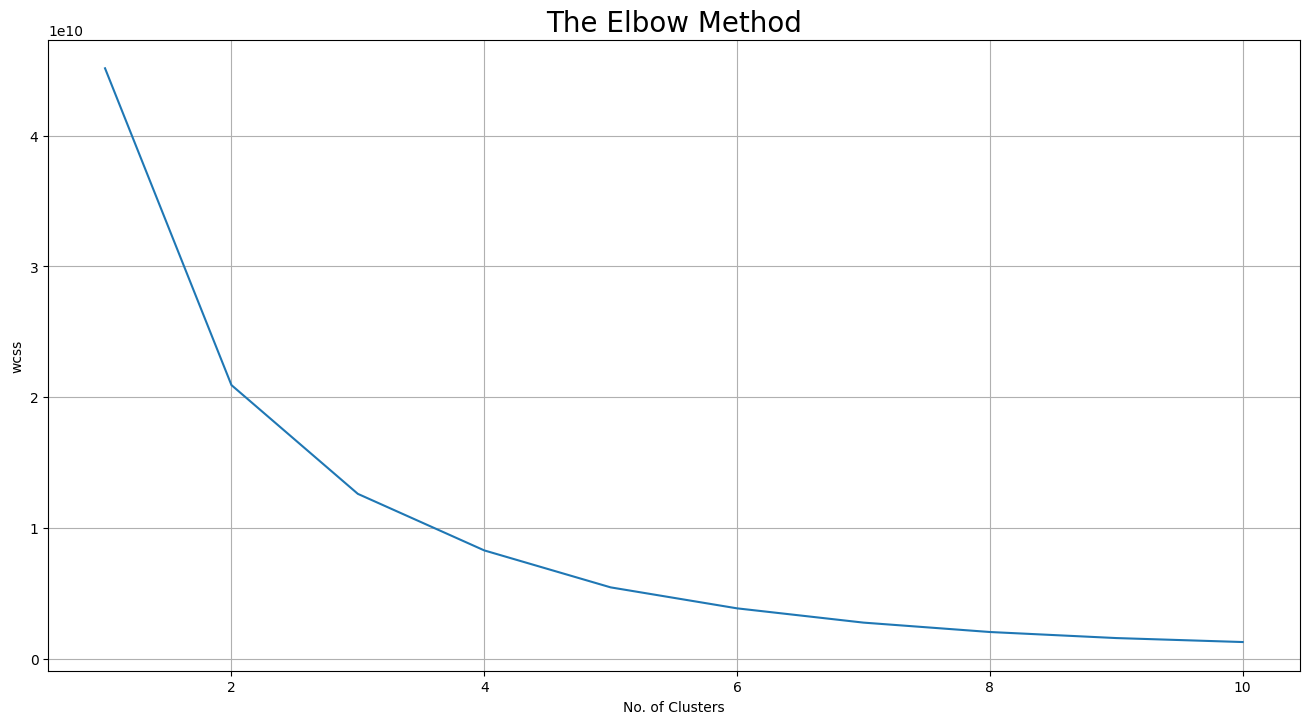

In [13]:
plt.rcParams['figure.figsize'] = (13, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [14]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

# get predicted cluster index for each sample: 0, 1, 2
y_means = km.fit_predict(x)

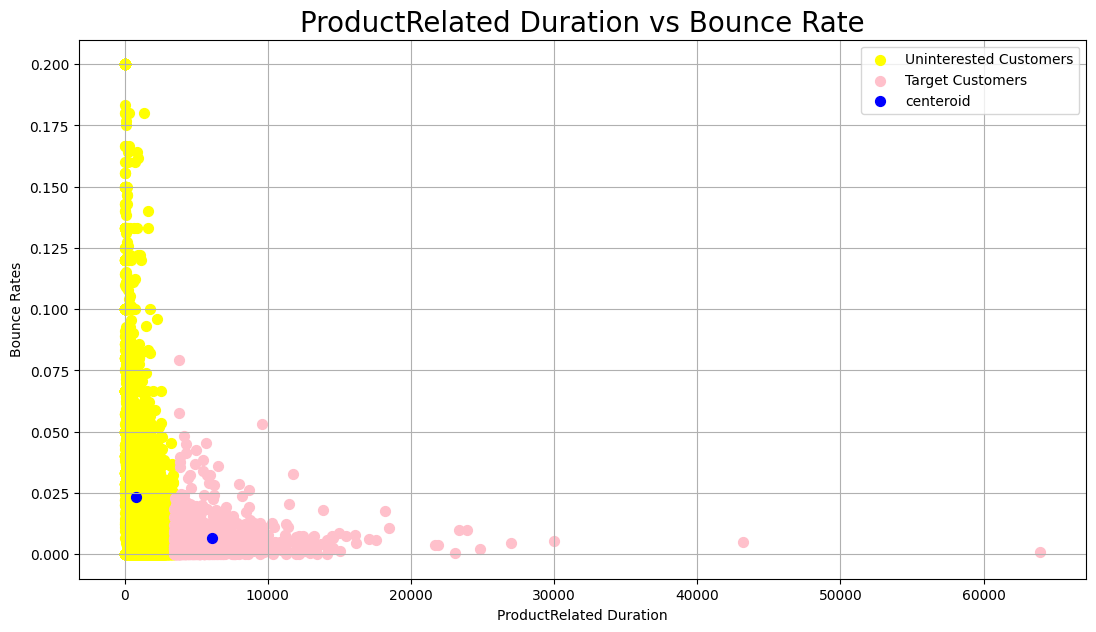

In [15]:
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'yellow', label = 'Uninterested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'pink', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('ProductRelated Duration vs Bounce Rate', fontsize = 20)
plt.grid()
plt.xlabel('ProductRelated Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels_true = le.fit_transform(data['Revenue'])

In [17]:
labels_pred = y_means

# print adjusted rand index, which measures the similarity of the two assignments
from sklearn import metrics
score = metrics.adjusted_rand_score(labels_true, labels_pred)
print("Adjusted rand index: ")
print(score)

Adjusted rand index: 
0.08359442469281096


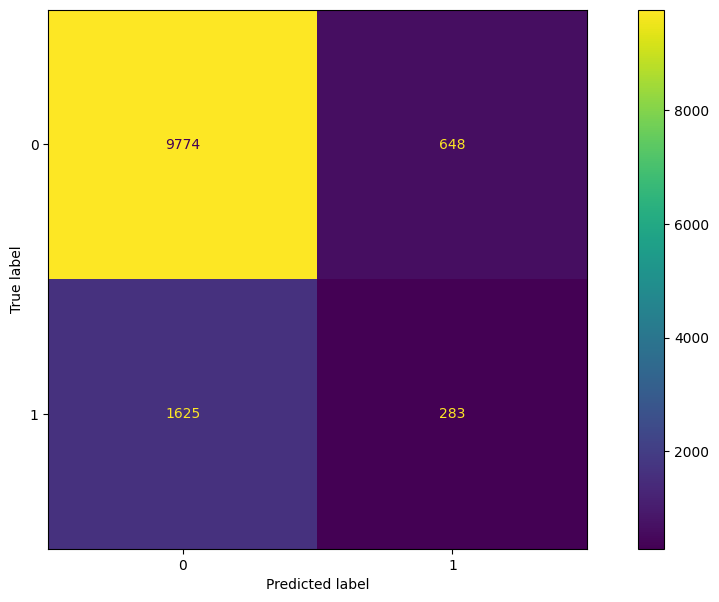

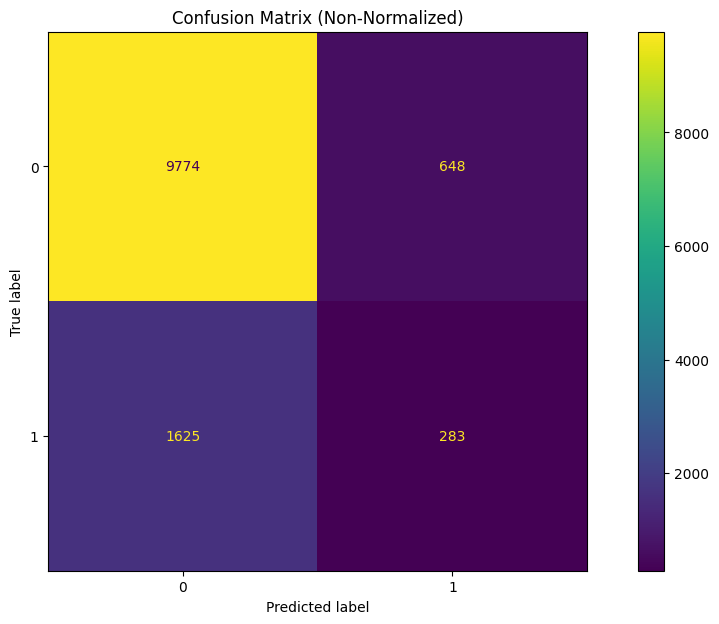

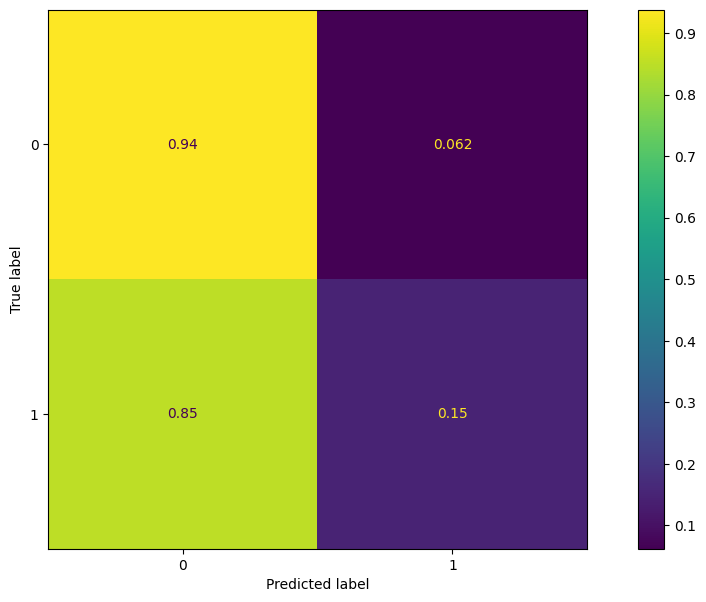

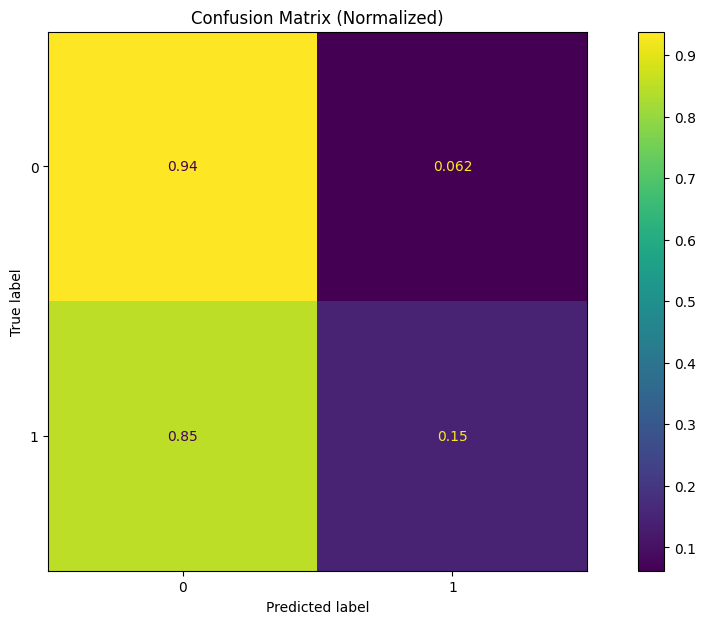

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Plotting non-normalized confusion matrix
plt_1 = ConfusionMatrixDisplay.from_predictions(labels_true, labels_pred, normalize=None)
plt_1.plot()
plt.title('Confusion Matrix (Non-Normalized)')
plt.show()

# Plotting normalized confusion matrix
plt_2 = ConfusionMatrixDisplay.from_predictions(labels_true, labels_pred, normalize='true')
plt_2.plot()
plt.title('Confusion Matrix (Normalized)')
plt.show()

### Logistic Regression for predicting Revenue

Given that 'Revenue' is a binary outcome (True/False, converted to 0/1), Logistic Regression is an appropriate supervised learning model to use. We will use the same features `ProductRelated_Duration` and `BounceRates` that were used for K-Means clustering to predict `Revenue`.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap

# Define features (X) and target (y)
# We'll use the same 'x' (ProductRelated_Duration and BounceRates) as features
X = x
y = labels_true # 'Revenue' column converted to numerical (0/1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Train a Logistic Regression model
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = classifier.predict(X_test)

# Evaluate the model (optional, but good practice)
from sklearn.metrics import accuracy_score, confusion_matrix
print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred_lr))
print('Logistic Regression Confusion Matrix:\n', confusion_matrix(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.8300356795329225
Logistic Regression Confusion Matrix:
 [[2553    6]
 [ 518    6]]


In [ ]:
df = data.copy()   # OU df = pd.read_csv("chemin.csv")


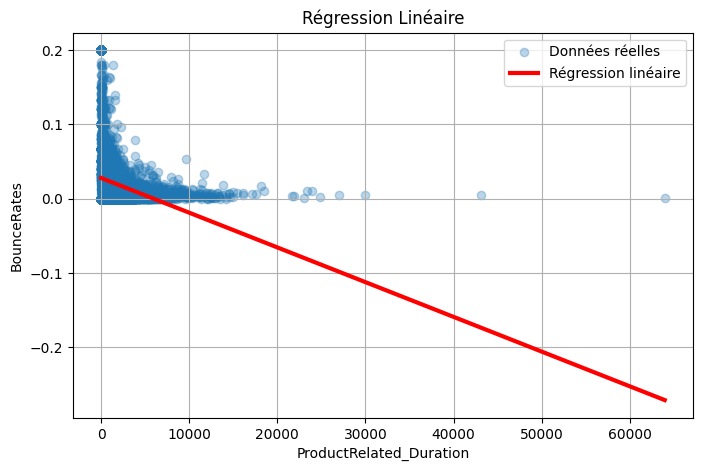

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd # Import pandas for data loading

# Ensure 'data' is available
if 'data' not in globals():
    try:
        # Assuming the path used in cell 67hws5iepQrK is correct.
        data = pd.read_csv('/kaggle/input/online-shoppers-purchasing-intention-dataset/online_shoppers_intention.csv')
    except FileNotFoundError:
        print("Error: Dataset file not found. Please ensure it's downloaded and path is correct.")
        raise # Stop execution if data cannot be loaded.

# Variables
X_lin = data[['ProductRelated_Duration']].values
y_lin = data['BounceRates'].values

# Modèle linéaire
lin_reg = LinearRegression()
lin_reg.fit(X_lin, y_lin)

# Prédiction pour la ligne
x_range = np.linspace(X_lin.min(), X_lin.max(), 300).reshape(-1,1)
y_pred_lin = lin_reg.predict(x_range)

# Graphique
plt.figure(figsize=(8,5))
plt.scatter(X_lin, y_lin, alpha=0.3, label='Données réelles')
plt.plot(x_range, y_pred_lin, linewidth=3, color='red', label='Régression linéaire')
plt.xlabel('ProductRelated_Duration')
plt.ylabel('BounceRates')
plt.title('Régression Linéaire')
plt.legend()
plt.grid()
plt.show()

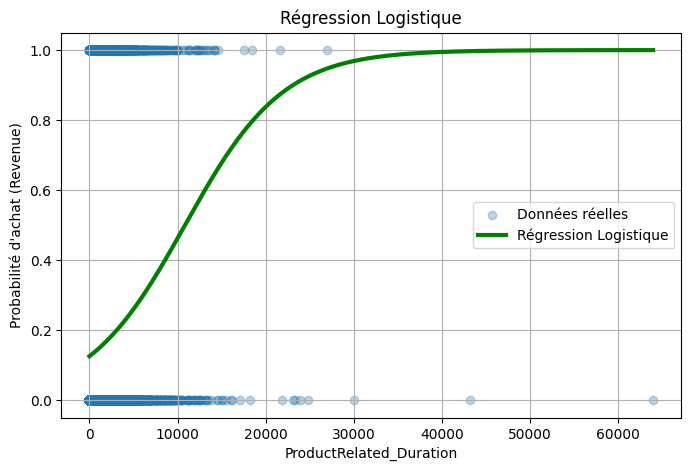

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression # Added this import
import pandas as pd # Import pandas for data loading

# Ensure 'data' is available
if 'data' not in globals():
    try:
        # Assuming the path used in cell 67hws5iepQrK is correct.
        data = pd.read_csv('/kaggle/input/online-shoppers-purchasing-intention-dataset/online_shoppers_intention.csv')
    except FileNotFoundError:
        print("Error: Dataset file not found. Please ensure it's downloaded and path is correct.")
        raise # Stop execution if data cannot be loaded.

X_log = data[['ProductRelated_Duration']].values
y_log = data['Revenue'].astype(int).values  # TRUE/FALSE -> 1/0

# Modèle
log_reg = LogisticRegression()
log_reg.fit(X_log, y_log)

# Courbe sigmoïde
x_range = np.linspace(X_log.min(), X_log.max(), 300).reshape(-1,1)
y_pred_log = log_reg.predict_proba(x_range)[:,1]

# Graphique
plt.figure(figsize=(8,5))
plt.scatter(X_log, y_log, alpha=0.3, label='Données réelles')
plt.plot(x_range, y_pred_log, color='green', linewidth=3, label='Régression Logistique')
plt.xlabel('ProductRelated_Duration')
plt.ylabel('Probabilité d\'achat (Revenue)')
plt.title('Régression Logistique')
plt.legend()
plt.grid()
plt.show()